# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [14]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy
import seaborn as sns
plt.style.use('seaborn-white')



#### Step 2: Examine your data 

In [15]:
df_airport = pd.read_csv("../assets/airports.csv")

In [10]:
df_airport.shape

(5167, 13)

In [11]:
df_airport.head(3)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes


In [16]:
df_raw = pd.read_csv("../assets/airport_cancellations.csv")
df1 = df_raw.dropna() 
print df1.head()

  Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   
2     ABQ  2006.0                    392.0                  329.0   
3     ABQ  2007.0                    366.0                  304.0   
4     ABQ  2008.0                    333.0                  300.0   

   Departure Diversions  Arrival Diversions  
0                  71.0                46.0  
1                  61.0                33.0  
2                  71.0               124.0  
3                 107.0                45.0  
4                  79.0                42.0  


In [13]:
df1.shape

(805, 6)

In [17]:
df2_raw = pd.read_csv("../assets/Airport_operations.csv")
df2 = df2_raw.dropna() 
print df2.head()

  airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0

In [15]:
df2.shape

(841, 15)

### Intro: Write a problem statement / aim for this project

The aim of this project is to analyze the operations of major airports around the country and trying to figure out the factors that cause departure and operational flight delays.  
 
The datasets provide details about the arrival and departure delays/diversions by airport, flight cancellations, locations of the airports and the year for each recording.  

I intend to conduct PCA analysis to figure out the factors leading to delays in arrival and departure delays in the airports. 


### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [ ]:
import psycopg2 
from pandas.io import sql

conn = psycopg2.connect(database="", user="", password="",host="", port="5432")
print "opened data successfully"

Load our csv files into tables

Join airport_cancellations.csv and airports.csv into one table

Query the database for our intial data

#### 1.2 What are the risks and assumptions of our data? 


We assume the data to be accurate. Human error could cause discrepency in the data and influence any correaltion we arrive at in our analysis.

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [18]:
df = pd.concat([df1, df2], axis = 1)
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,airport,year,departures for metric computation,arrivals for metric computation,...,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004.0,242.0,235.0,71.0,46.0,ABQ,2004,53971,53818,...,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005.0,221.0,190.0,61.0,33.0,ABQ,2005,51829,51877,...,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006.0,392.0,329.0,71.0,124.0,ABQ,2006,49682,51199,...,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007.0,366.0,304.0,107.0,45.0,ABQ,2007,53255,53611,...,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008.0,333.0,300.0,79.0,42.0,ABQ,2008,49589,49512,...,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [17]:
df.shape

(841, 21)

In [19]:
new_df = df.dropna()
print new_df.head()

  Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   
2     ABQ  2006.0                    392.0                  329.0   
3     ABQ  2007.0                    366.0                  304.0   
4     ABQ  2008.0                    333.0                  300.0   

   Departure Diversions  Arrival Diversions airport  year  \
0                  71.0                46.0     ABQ  2004   
1                  61.0                33.0     ABQ  2005   
2                  71.0               124.0     ABQ  2006   
3                 107.0                45.0     ABQ  2007   
4                  79.0                42.0     ABQ  2008   

   departures for metric computation  arrivals for metric computation  \
0                              53971                            53818   
1                              51829                            51877   

In [19]:
new_df.shape

(805, 21)

In [20]:
new_df.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2008.986335,1292.038509,1333.124224,173.315528,169.413665,2009.014907,111331.108075,110868.648447,0.770338,0.719039,0.760144,13.299888,13.813453,3.604907,16.059615,2.930112,1.385006,3.322807,13.743565
std,3.158116,1835.961943,1975.224868,172.345539,228.521615,3.152394,99041.431112,98682.707680,0.075023,0.088554,0.068339,4.076106,3.836060,2.397139,4.937230,1.199621,0.879909,1.029183,3.907379
min,2004.000000,0.000000,0.000000,0.000000,0.000000,2004.000000,261.000000,259.000000,0.246700,0.245700,0.349500,5.350000,7.040000,0.000000,6.290000,0.950000,0.000000,1.230000,6.330000
25%,2006.000000,349.000000,314.000000,62.000000,41.000000,2006.000000,39279.000000,39178.000000,0.747500,0.686300,0.738100,10.950000,11.330000,2.230000,12.980000,2.060000,0.820000,2.630000,11.270000
50%,2009.000000,663.000000,642.000000,110.000000,84.000000,2009.000000,73741.000000,73323.000000,0.782400,0.736200,0.769300,12.670000,12.930000,3.030000,15.240000,2.660000,1.120000,3.150000,13.070000
75%,2012.000000,1472.000000,1523.000000,236.000000,190.000000,2012.000000,166455.000000,164961.000000,0.809300,0.770700,0.797500,14.820000,15.720000,4.190000,17.850000,3.620000,1.770000,3.850000,15.190000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,40.800000,35.760000,18.940000,40.870000,7.820000,6.180000,7.520000,34.280000


In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 21 columns):
Airport                               805 non-null object
Year                                  805 non-null float64
Departure Cancellations               805 non-null float64
Arrival Cancellations                 805 non-null float64
Departure Diversions                  805 non-null float64
Arrival Diversions                    805 non-null float64
airport                               805 non-null object
year                                  805 non-null int64
departures for metric computation     805 non-null int64
arrivals for metric computation       805 non-null int64
percent on-time gate departures       805 non-null float64
percent on-time airport departures    805 non-null float64
percent on-time gate arrivals         805 non-null float64
average_gate_departure_delay          805 non-null float64
average_taxi_out_time                 805 non-null float64
average taxi out d

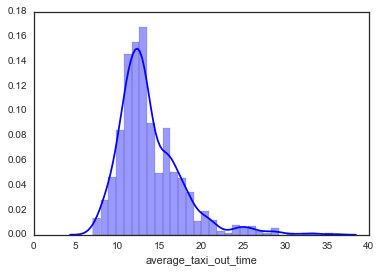

In [22]:
# the plot shows a positive skew
%matplotlib inline
sns.distplot(new_df['average_taxi_out_time'], hist=True, color="b")

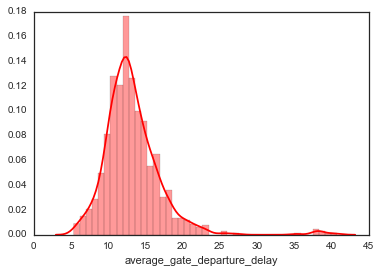

In [23]:
# the plot presents a positive skew
sns.distplot(new_df['average_gate_departure_delay'], hist=True, color="r")

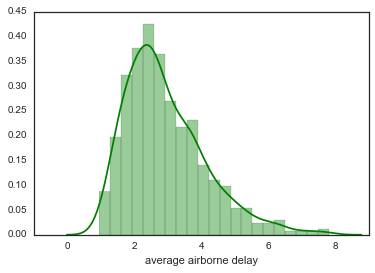

In [24]:
#the data has a positive skew
sns.distplot(new_df['average airborne delay'], hist=True, color="g")

It can be observed that all the above plots have a positive skew. However, the positive skew of 'average airborne delay' is relatively more compared to 'average gata departure delay' and 'average taxi time out'.

#### Are there any unique values? 

In [25]:
new_df['Airport'].unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'HNL', 'HOU', 'HPN', 'IAD', 'IAH',
       'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB', 'MCI',
       'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK',
       'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL', 'PHX',
       'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT', 'SDF',
       'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'SWF',
       'TPA', 'TUS'], dtype=object)

In [26]:
new_df['Airport'].nunique()

74

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [20]:
from sklearn.preprocessing import LabelEncoder

new_df["Airport"] = LabelEncoder().fit_transform(new_df["Airport"])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [29]:
new_df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,airport,year,departures for metric computation,arrivals for metric computation,...,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,0,2004.0,242.0,235.0,71.0,46.0,ABQ,2004,53971,53818,...,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,0,2005.0,221.0,190.0,61.0,33.0,ABQ,2005,51829,51877,...,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,0,2006.0,392.0,329.0,71.0,124.0,ABQ,2006,49682,51199,...,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,0,2007.0,366.0,304.0,107.0,45.0,ABQ,2007,53255,53611,...,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,0,2008.0,333.0,300.0,79.0,42.0,ABQ,2008,49589,49512,...,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


#### 3.2 Format and Clean the Data

In [21]:
#create a new data frame with the desired columns
df3 = new_df.drop(['airport', 'year', 'departures for metric computation', 'arrivals for metric computation'], axis = 1)

In [29]:
list(df3.columns)

['Airport',
 'Year',
 'Departure Cancellations',
 'Arrival Cancellations',
 'Departure Diversions',
 'Arrival Diversions',
 'percent on-time gate departures',
 'percent on-time airport departures',
 'percent on-time gate arrivals',
 'average_gate_departure_delay',
 'average_taxi_out_time',
 'average taxi out delay',
 'average airport departure delay',
 'average airborne delay',
 'average taxi in delay',
 'average block delay',
 'average gate arrival delay']

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

Scipy has a function called normal test that tests for normal distribution in the data i.e. it tests whether a sample differs from normal distribution. 

In [22]:
from scipy.stats import pearsonr, normaltest
normaltest(df3)

NormaltestResult(statistic=array([ 561.18915806,  652.90768981,  684.12784677,  679.5944024 ,
        340.66598773,  546.4736383 ,  577.53660583,  295.17635646,
        458.57576139,  496.02504111,  289.30494498,  432.03200401,
        283.67638196,  127.70305447,  225.93378643,  112.80578789,
        296.78839796]), pvalue=array([  1.37823310e-122,   1.67069265e-142,   2.77667862e-149,
         2.67886330e-148,   1.06003616e-074,   2.16150971e-119,
         3.88614942e-126,   8.00329087e-065,   2.63960320e-100,
         1.94773953e-108,   1.50740310e-063,   1.53264766e-094,
         2.51452717e-062,   1.86051879e-028,   8.69163819e-050,
         3.19546744e-025,   3.57452416e-065]))

In [23]:
from sklearn import preprocessing
df3_normalized = preprocessing.normalize(df3, norm='l2')

#### 4.2 Find correlations in the data

"personr" calculates a Pearson correlation coefficient and the p-value for testing non-correlation.  

It measures the linear relationship between two datasets. Pearson's correlation requires that dataset be normally distributed. The coefficient varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases."  


In [32]:
pearsonr(df3['average_taxi_out_time'], df3['average airborne delay']) 

(0.55627944020189213, 1.3823148509936676e-66)

In [33]:
pearsonr(df3['Year'], df3['average airborne delay'])

(-0.20206873684615906, 7.2919205385875003e-09)

In [34]:
pearsonr(df3['average_gate_departure_delay'], df3['average airborne delay'])

(0.39677991926022937, 9.5054218292719913e-32)

The personr tests show that we do have some linear relationship between 'average taxi time out' and 'average airborne delay'. This is kind of obvious that if the 'average taxi time out' increases i.e. if there is a delay in taxi time out, an airplane is likely to face longer airborne delay because it might not have the landing clearance at the destination airport.

In the case of 'year' to 'average airborne delay', there is a negative correaltion. As the 'year' increases the 'average airborne delay' decreases. This could imply that with the increase in modernization, the airport delays decrease.


#### 4.3 What is the value of understanding correlations before PCA? 

Correlated variables will help us better understand patterns in our data as they are a common factor in PCA analysis.

#### 4.4 Validate your findings using statistical analysis

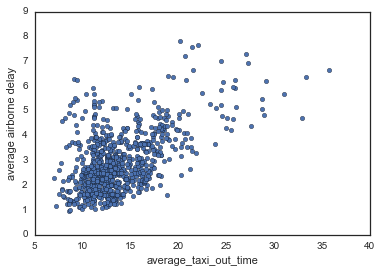

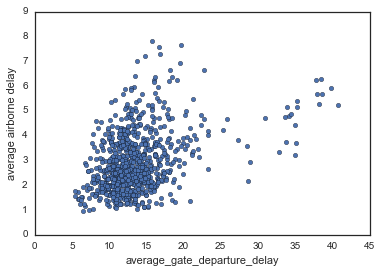

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
names = ['average_taxi_out_time', 'average_gate_departure_delay']
for name in names:
    df.plot.scatter(x=name, y='average airborne delay')

The above plot show that the 'average airborne delay' has a positive correlation with 'average taxi out time' and 'average gate departure delay'.

#### 4.5 How can you improve your overall analysis? 

We may be able to improve our analysis by reducing the number of features in our dataset. We could also possibly find better correlations in other datasets. 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

In [27]:
  # Create a clean data frame 
df4 = df3[['Airport','Year','average_taxi_out_time','average_gate_departure_delay', 'average taxi out delay', 'average airborne delay']]
print df4.head()

   Airport    Year  average_taxi_out_time  average_gate_departure_delay  \
0        0  2004.0                   9.89                         10.38   
1        0  2005.0                   9.79                          9.60   
2        0  2006.0                   9.89                         10.84   
3        0  2007.0                  10.34                         11.29   
4        0  2008.0                  10.41                         10.79   

   average taxi out delay  average airborne delay  
0                    2.43                    2.46  
1                    2.29                    2.26  
2                    2.16                    2.12  
3                    2.40                    2.19  
4                    2.41                    1.82  


In [28]:
df4_compare = df4[['average_taxi_out_time','average_gate_departure_delay', \
                   'average taxi out delay', 'average airborne delay']]

In [29]:
#standardize the columns

df4_compare = (df4_compare - df4_compare.mean()) / df4_compare.std() 

This allows us to see some basic correlations across the columns associated with delays - date is not included here.
We see a direct correlation between average taxi out time and average departure delay, which is not suprising.
However, average taxi out delay and average airborne delay do not seem to be correlated and that has some interesting implication.
We will move on to a more robust PCA analysis from here to see if we can prove out these correlations in further detail.

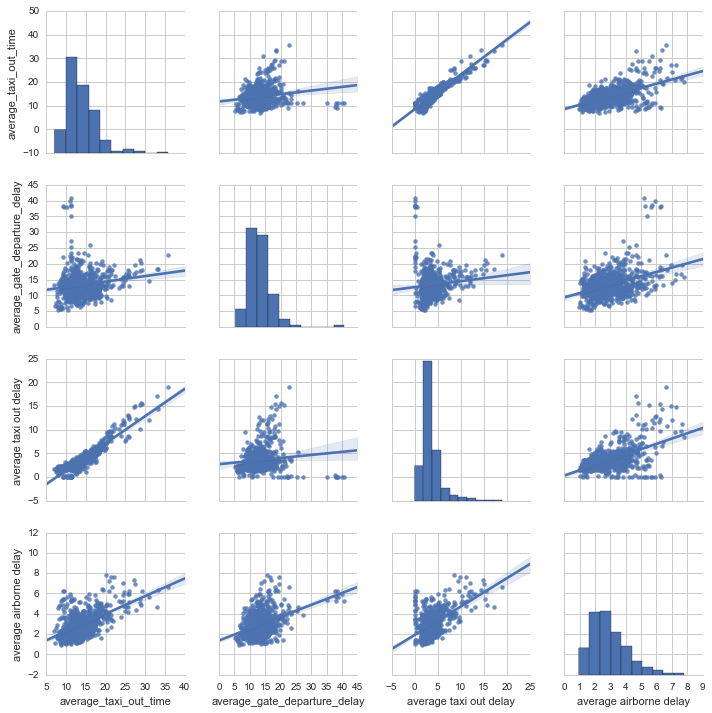

In [45]:
#from the plot we can find correlations between delays

%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')

sns.pairplot(df4_compare, kind='reg')

In [30]:
# x and y variables for PCA analysis
x = df4.ix[:,1:6].values
y = df4.ix[:,0].values

In [31]:
#standardize the x variable using StandardScalar

xStand = preprocessing.StandardScaler().fit_transform(x)

In [32]:
#create covariance matrix

covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [33]:
print(eigenValues)

[ 2.48777041  1.09032613  0.96575037  0.38335868  0.07901331]


In [34]:
print(eigenVectors)

[[ 0.11615431 -0.66841294  0.6858432  -0.26141072 -0.03187243]
 [-0.57878477  0.08907169  0.31436216  0.25417706  0.70259866]
 [-0.23731062 -0.71359507 -0.4902383   0.43837477 -0.04426864]
 [-0.57641886  0.1602893   0.30342756  0.2165829  -0.70927583]
 [-0.51277805 -0.10188126 -0.31367763 -0.79245054  0.01753168]]


In [43]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0], i[1])

(2.4877704127852915, array([ 0.11615431, -0.57878477, -0.23731062, -0.57641886, -0.51277805]))
(1.0903261331704173, array([-0.66841294,  0.08907169, -0.71359507,  0.1602893 , -0.10188126]))
(0.96575037105915895, array([ 0.6858432 ,  0.31436216, -0.4902383 ,  0.30342756, -0.31367763]))
(0.38335867917053001, array([-0.26141072,  0.25417706,  0.43837477,  0.2165829 , -0.79245054]))
(0.07901330928723696, array([-0.03187243,  0.70259866, -0.04426864, -0.70927583,  0.01753168]))


In [41]:
from sklearn.decomposition import PCA
from sklearn import metrics

PCA_A = PCA(n_components=5)
Y = PCA_A.fit_transform(xStand)

In [42]:
components = PCA_A.components_
print components

[[ 0.11615431 -0.57878477 -0.23731062 -0.57641886 -0.51277805]
 [-0.66841294  0.08907169 -0.71359507  0.1602893  -0.10188126]
 [ 0.6858432   0.31436216 -0.4902383   0.30342756 -0.31367763]
 [ 0.26141072 -0.25417706 -0.43837477 -0.2165829   0.79245054]
 [-0.03187243  0.70259866 -0.04426864 -0.70927583  0.01753168]]


In [43]:
print Y

[[ 1.06269997  1.43768835 -1.07968474 -0.04316779 -0.29598831]
 [ 1.27926829  1.36785081 -0.74211482  0.01068518 -0.27741248]
 [ 1.31989542  0.94437346 -0.64567579 -0.12734731 -0.24621778]
 ..., 
 [-1.22513107 -5.94660125 -3.91610938 -0.70273446  0.25376156]
 [-1.06939673 -5.69722872 -3.38359531 -0.31737467  0.2701497 ]
 [-0.90483215 -5.41147787 -2.85597486  0.17097837  0.29523592]]


In [44]:
print PCA_A.explained_variance_ratio_

[ 0.496936    0.21779434  0.19291014  0.07657649  0.01578303]


In [45]:
print PCA_A.explained_variance_

[ 2.48468001  1.08897169  0.96455068  0.38288246  0.07891516]


In [46]:
print PCA_A.explained_variance_ratio_.cumsum()

[ 0.496936    0.71473034  0.90764048  0.98421697  1.        ]


In [46]:
Ydf = pd.DataFrame(Y, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])

In [47]:
Ydf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,1.062700,1.437688,-1.079685,-0.043168,-0.295988
1,1.279268,1.367851,-0.742115,0.010685,-0.277412
2,1.319895,0.944373,-0.645676,-0.127347,-0.246218
3,1.174858,0.674328,-0.433545,-0.098211,-0.248768
4,1.386069,0.583874,-0.052254,-0.211692,-0.248975


In [56]:
print df4.columns, '\n'
print '-------------------------------------\n'

for i, pc in enumerate(['PCA1','PCA2','PCA3', 'PCA4', 'PCA5']):
    print pc, 'weighting vector:', components[i]
    print '-------------------------------------\n'

Index([u'Airport', u'Year', u'average_taxi_out_time',
       u'average_gate_departure_delay', u'average taxi out delay',
       u'average airborne delay'],
      dtype='object') 

-------------------------------------

PCA1 weighting vector: [ 0.11615431 -0.57878477 -0.23731062 -0.57641886 -0.51277805]
-------------------------------------

PCA2 weighting vector: [-0.66841294  0.08907169 -0.71359507  0.1602893  -0.10188126]
-------------------------------------

PCA3 weighting vector: [ 0.6858432   0.31436216 -0.4902383   0.30342756 -0.31367763]
-------------------------------------

PCA4 weighting vector: [ 0.26141072 -0.25417706 -0.43837477 -0.2165829   0.79245054]
-------------------------------------

PCA5 weighting vector: [-0.03187243  0.70259866 -0.04426864 -0.70927583  0.01753168]
-------------------------------------



In [53]:
#create a new dataframe with the year and airport columns
df5 = df4[['Airport', 'Year']]

In [54]:
#join the above dataframe to the PCA results to forms a new dataframe
airport_pca = df5.join(Ydf, on=None, how='left')

In [58]:
airport_pca.head(3)

,Airport,Year,PCA1,PCA2,PCA3,PCA4,PCA5
0,0,2004.0,1.062700,1.437688,-1.079685,-0.043168,-0.295988
1,0,2005.0,1.279268,1.367851,-0.742115,0.010685,-0.277412
2,0,2006.0,1.319895,0.944373,-0.645676,-0.127347,-0.246218


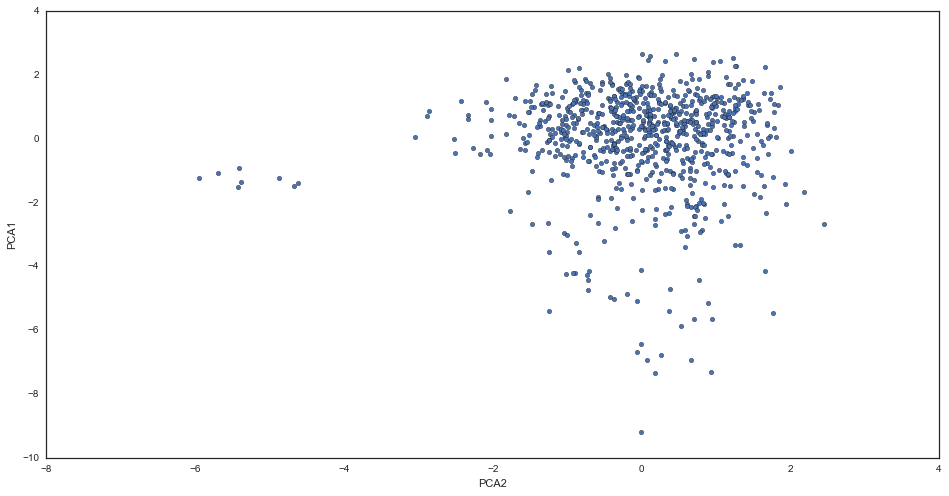

In [57]:
graph = airport_pca.plot(kind='scatter', x='PCA2', y='PCA1', figsize=(16,8))
graph

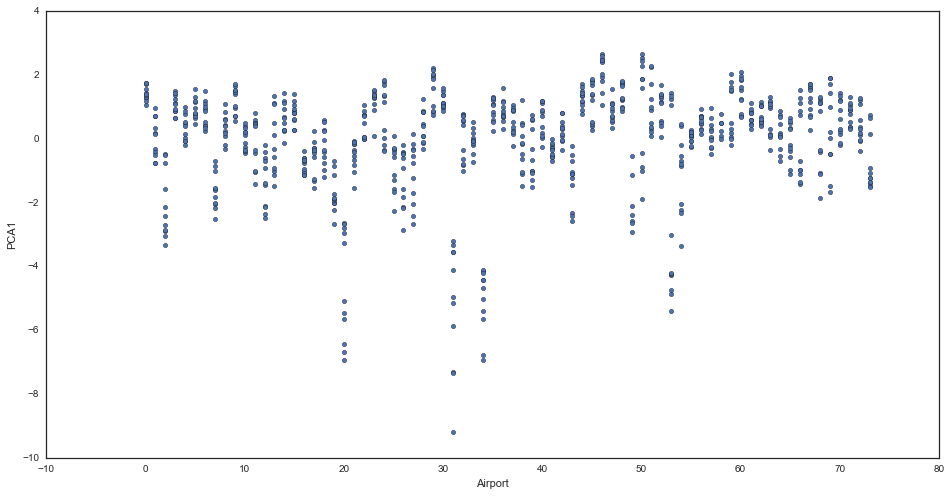

In [59]:
graph = airport_pca.plot(kind='scatter', x='Airport', y='PCA1', figsize=(16,8))
graph

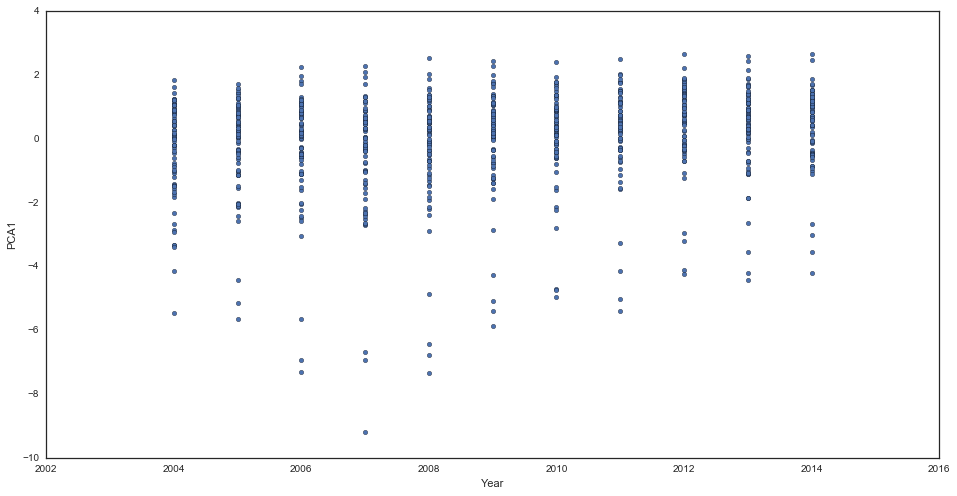

In [60]:
graph = airport_pca.plot(kind='scatter', x='Year', y='PCA1', figsize=(16,8))
graph

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

## Perform K-Means clustering

In [105]:

X = df4.ix[:,1:6].values
y = df4.ix[:,0].values

In [106]:
from sklearn import cluster, metrics
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [107]:
#compute labels and centroids

clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

In [108]:
from scipy import stats
labels = np.zeros_like(clusters)
for i in range(k):
    mask = (clusters == i)
    labels[mask] = stats.mode(y[mask])[0]

In [109]:
print(labels)
print(centroids)

[ 9  9  9  9  9  9  9  9  9 22 22 22 22  9 22  9 22 22 22  9  9  9 20 20 20
 20 20 20 20 20 20 20 22  9  9  9  9  9  9  9  9  9 22 22  9  9  9  9  9  9
  9  9  9 22 22  9  9  9  9  9  9  9  9  9 22 22  9  9  9  9  9  9  9  9  9
 22 22 20 20 20 20 20 20 20 20  9 20 22  9  9  9 22 22  9 22 22 22 22 22  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 22 22 22 22  9  9  9  9
  9  9  9  9  9 22 22  9  9 20 20 20 20  9 20  9  9 22  9  9  9  9  9  9  9
  9  9 22 22  9  9  9 22  9  9 22 22  9 22 22  9  9  9  9  9  9  9  9  9 22
 22  9  9  9  9  9  9  9  9  9 22 22  9  9  9  9  9  9  9  9 22 22 22 20  9
  9 22  9 22  9  9  9 22 22  9 20 20 20 20 20 20  9  9 20 22 20 20 20 20 20
 20 20 20 20 20 20  9 20  9 22 22  9 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22  9  9  9  9  9  9  9  9  9  9  9  9  9  9 22 22  9 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 20 20 20 20 20 22 22 22 22 22 22 20 20 20
 20 20  9  9  9 22 22 22  9  9  9  9  9  9  9  9  9 22 22  9  9  9  9  9  9
  9  9 22 22

In [110]:
metrics.accuracy_score(y, labels)

0.040993788819875775

In [111]:
#print(metrics.classification_report(y, labels))

In [112]:
#print(metrics.confusion_matrix(y, labels))

## Extra trees classification

In [113]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

trees = ExtraTreesClassifier()
trees.fit(X, labels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [114]:
print(trees.feature_importances_)

[ 0.18583729  0.15543097  0.39503494  0.19157698  0.07211982]


In [115]:
## KNN Classifier

knn = KNeighborsClassifier()
knn.fit(X, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [116]:
exp = labels
predicted = knn.predict(x)

In [117]:
print(metrics.classification_report(exp, predicted))
print(metrics.confusion_matrix(exp, predicted))

             precision    recall  f1-score   support

          9       0.98      0.99      0.98       478
         20       0.98      0.93      0.96       103
         22       0.98      0.97      0.98       224

avg / total       0.98      0.98      0.98       805

[[474   1   3]
 [  6  96   1]
 [  5   1 218]]


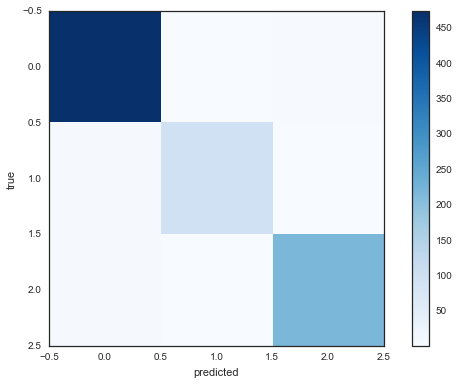

In [118]:
fig, ax = plt.subplots(figsize=(10,6))
#print(metrics.confusion_matrix(exp, predicted))
plt.imshow(metrics.confusion_matrix(exp, predicted),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## Hierarchical Clustering

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
Z = linkage(X, 'ward')

In [88]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.45493113667831225

In [89]:
max_d = 30
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 11,  7,  7,  7,  7, 10,
       12, 10, 10, 10, 10,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  8,
        8,  8,  7,  7,  9,  9,  9, 10, 10, 10,  8,  8,  7,  7,  7,  9,  9,
       10, 10, 10, 10,  8,  8,  7,  7,  7,  7,  9, 10, 10, 10, 12,  8,  8,
        7,  7,  7,  9, 10, 10, 10, 10, 12,  4,  4,  4,  4,  4,  3,  3,  3,
        3,  3,  3,  7,  7,  7,  7,  7, 10, 10, 10, 10, 12, 12,  8,  8,  8,
        8,  9,  8,  9, 10, 10, 10, 10,  7,  7,  7,  7,  7,  7, 10, 10, 10,
       12, 12,  4,  4,  8,  5,  7,  9,  9, 10, 10, 12, 12,  5,  5,  4,  4,
        4,  3,  3,  3,  3,  3,  3,  5,  8,  8,  5,  5,  3,  9, 10, 10, 10,
       12,  8,  8,  8,  8,  8,  8, 10, 10, 10, 10, 12,  7,  7,  7,  7,  7,
        9,  9, 10, 10, 10, 12,  8,  5,  5,  5,  5,  3,  3,  3,  3,  3, 12,
        8,  8,  5,  5,  5,  5,  9,  9, 10, 12, 12,  4,  4,  5,  5,  5,  5,
        9, 10, 10, 12, 12,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  2,
        2,  2,  2,  2,  2

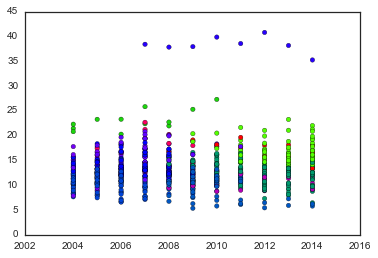

In [90]:
plt.scatter(X[:,0], X[:,2], c=clusters, cmap='prism')
plt.show()

In [91]:
#Extra tree classifier
trees2 = ExtraTreesClassifier()
trees2.fit(X, clusters)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
print(trees2.feature_importances_)

[ 0.26457549  0.23068529  0.24534042  0.15634395  0.10305486]


In [93]:
# KNN classifier

knn2 = KNeighborsClassifier()
knn2.fit(X, clusters)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [94]:
exp2 = clusters
predicted2 = knn2.predict(X)

In [95]:
print(metrics.classification_report(exp, predicted))
print(metrics.confusion_matrix(exp, predicted))

             precision    recall  f1-score   support

          9       0.98      0.99      0.98       478
         20       0.98      0.93      0.96       103
         22       0.98      0.97      0.98       224

avg / total       0.98      0.98      0.98       805

[[474   1   3]
 [  6  96   1]
 [  5   1 218]]


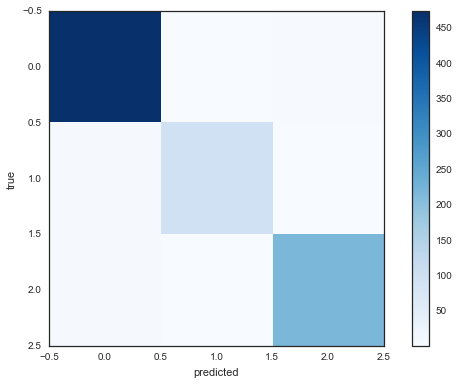

In [96]:
fig, ax = plt.subplots(figsize=(10,6))
#print(metrics.confusion_matrix(exp, predicted))
plt.imshow(metrics.confusion_matrix(exp, predicted),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

### Part 7: Write an analysis plan of your findings 

PCA is a great resource in helping us better analyze the dataset in relation to aiport/airline delays.  

One of the most helpful observation came from the age correlation we discovered in our PCA analysis. We observed that the older the report was there was an increase in airline delay.  This indicates that as airports and airlines modernized, they reduced their delays. Hence if an airline invested in modernization of airports and airlines, they could see a decrease in delays both on the ground and in the air. 

I would hence recommend investing on airport and airline modernization.

